In [28]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
# Dataset  -https://www.kaggle.com/mansoordaku/ckdisease 

In [29]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("kidney_disease.csv")
df.head()

Saving kidney_disease.csv to kidney_disease (1).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [30]:
df.shape

(400, 26)

In [31]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [32]:
column_to_retain = ['sg', 'al','sc','hemo', 'pcv', 'htn','classification']
df = df.drop([col for col in df.columns if not col in column_to_retain],axis=1)
df = df.dropna(axis=0)

In [33]:
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [34]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [35]:
x = df.drop(['classification'],axis=1)
y = df['classification']

In [36]:
x_scaler =  MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [37]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
model = Sequential()
model.add(Dense(256,input_dim = len(x.columns),kernel_initializer=k.initializers.random_normal(seed=13),activation = 'relu'))
model.add(Dense(1,activation="hard_sigmoid"))


In [39]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
history= model.fit(x_train,y_train,epochs=2000,batch_size = x_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5022
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5764
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6594
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.7424
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.7817
Epoch 6/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.8122
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.8210
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.8297
Epoch 9/2000
1/1 [==============================] - 0s 882us/step - loss: 0.6278 - accuracy: 0.8297
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.8384
Epoch 11/2000
1/1

In [41]:
model.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model/assets


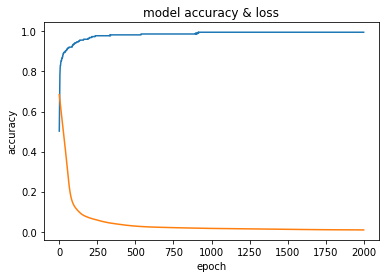

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [27]:
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]

In [43]:
print(pred)

[0, 1, 0, 1, 1]

In [44]:
print(y_test)

ImportError: ignored